Installing pytorch

In [1]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.8/133.8 MB 7.3 MB/s eta 0:00:0000:0100:01


Cloning YOLOv5 pretrained model

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11940, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 11940 (delta 67), reused 55 (delta 22), pack-reused 11800
Receiving objects: 100% (11940/11940), 12.57 MiB | 7.21 MiB/s, done.
Resolving deltas: 100% (8181/8181), done.


In [4]:
#!cd yolov5 & pip install -r requirements.txt

Importing dependencies

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [8]:
#Loading the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/Users/yazeedshamsudeen/opt/anaconda3/lib/python3.9/site-packages/torch/hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/yazeedshamsudeen/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-21 Python-3.9.12 torch-1.12.1 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Testing the model on a sample image

In [12]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [13]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1216.4ms pre-process, 227.2ms inference, 2.8ms NMS per image at shape (1, 3, 384, 640)


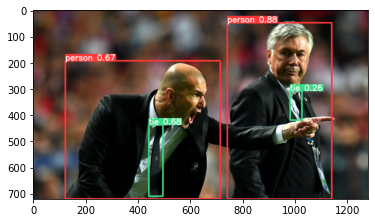

In [18]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [24]:
results.render()

[array([[[ 32,  42,  34],
         [ 32,  42,  34],
         [ 32,  42,  34],
         ...,
         [ 36,  61,  53],
         [ 44,  69,  61],
         [ 44,  69,  61]],
 
        [[ 32,  42,  34],
         [ 32,  42,  34],
         [ 32,  42,  34],
         ...,
         [ 34,  59,  51],
         [ 39,  64,  56],
         [ 41,  66,  58]],
 
        [[ 34,  44,  36],
         [ 34,  44,  36],
         [ 34,  44,  36],
         ...,
         [ 38,  63,  55],
         [ 36,  61,  53],
         [ 34,  59,  51]],
 
        ...,
 
        [[110, 109, 111],
         [110, 109, 111],
         [111, 110, 112],
         ...,
         [126, 134, 138],
         [126, 134, 138],
         [126, 134, 138]],
 
        [[111, 110, 112],
         [111, 110, 112],
         [111, 110, 112],
         ...,
         [116, 124, 128],
         [114, 122, 126],
         [114, 122, 126]],
 
        [[111, 110, 112],
         [111, 110, 112],
         [111, 110, 112],
         ...,
         [112, 120, 124],
  

Testing the model from webcam

In [30]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [113]:
#YOLO model detect 80 classes, I here reduced the classes to just vehicles
model.classes = [1,2,3,5,7]
img = 'https://vietnam.postsen.com/temp/resized/medium_2022-08-06-e118f24231.jpg'
results = model(img)
print(results)

image 1/1: 450x700 1 bicycle, 4 cars, 9 motorcycles
Speed: 202.9ms pre-process, 185.1ms inference, 2.9ms NMS per image at shape (1, 3, 416, 640)



In [115]:
#a function to get the count of detected vehicles
def getcount(results):
    two=0
    four=0
    outputs = results.pandas().xyxy
    for output in outputs:
        for i in output['class']:
            if(i==1 or i==3):
                two+=1
            elif(i==2 or i==5 or i==7):
                four+=1
    return two,four                

In [127]:
#testing out on a sample video
cap = cv2.VideoCapture('videoplayback.mp4')
while cap.isOpened():
    #getting frames from the video
    ret, frame = cap.read()
    
    #feeding the frame to model
    results = model(frame)
    
    #getting vehicle count
    twowheeler, fourwheeler = getcount(results)
    
    #rendering the result so that we can add text on it and display
    img = np.squeeze(results.render())
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #adding text to each frame
    cv2.putText(img, 'Fourwheeler:'+str(fourwheeler)+'  Twowheeler:'+str(twowheeler), (20,40), font, 1, (255, 0, 255), 2, cv2.LINE_4)
    
    #displaying frame by frame
    cv2.imshow('YOLO', img)
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()